In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Section 2: Spin Spin Coupling

In [2]:
G=1.
Mq=1.
Rp=.3
Mp=5.
rbar=1.
e=.1
n=np.sqrt(G*Mp/rbar**5)
Omegap=0.00
Omegap=7.*n/2
ap =78.
bp = 276.
asphericity=1./1.*(1.-ap**2/bp**2)/(1.+ap**2/bp**2)
def get_Gamma11prograde(gamma,Omegap,H,Rp,rbar,n,e,asphericity):
    a=.5
    b=(-Omegap)
    c=((-Omegap)**2/2.-H+9./16.*Rp**2*G*Mq/rbar**5*asphericity*np.cos(2.*gamma))  
    d = (b**2) - (4*a*c)
    sol1 = (-b-np.sqrt(d))/(2*a)
    sol2 = (-b+np.sqrt(d))/(2*a)
    return sol1,sol2
def get_Gamma11progrademinus(gamma,Omegap,H,Rp,rbar,n,e,asphericity):
    a=.5
    b=(-Omegap-n/2.)
    c=((-Omegap-n/2.)**2/2.-H+45./32.*Rp**2*G*Mq/rbar**5*e*asphericity*np.cos(2.*gamma))  
    d = (b**2) - (4*a*c)
    sol1 = (-b-np.sqrt(d))/(2*a)
    sol2 = (-b+np.sqrt(d))/(2*a)
    return sol1,sol2
def get_Gamma11progradeplus(gamma,Omegap,H,Rp,rbar,n,e,asphericity):
    a=.5
    b=(-Omegap+n/2.)
    c=((-Omegap+n/2.)**2/2.-H+45./32.*Rp**2*G*Mq/rbar**5*e*asphericity*np.cos(2.*gamma))  
    d = (b**2) - (4*a*c)
    sol1 = (-b-np.sqrt(d))/(2*a)
    sol2 = (-b+np.sqrt(d))/(2*a)
    return sol1,sol2
def pend(y, t,G,Mq,Rp,rbar,e,n,Omegap,asphericity):
    alpha, Alpha = y
    
    #2nd term -- prograde spin spin
    arg1=np.sin(2.*alpha-2.*Omegap*t)
    arg2=e*5./2.*np.sin(2.*alpha-2.*Omegap*t-n*t)
    arg3=e*5./2.*np.sin(2.*alpha-2.*Omegap*t+n*t)
    #dAlphadt_prograde = -9.*G*M*Rp**2/(8.*rbar**5)*(arg1+arg2+arg3)
    dAlphadt_prograde = +9.*G*Mq*Rp**2*asphericity/(8.*rbar**5)*(arg1+arg2+arg3)
    dAlphadt=dAlphadt_prograde#+dAlphadt_spinorbit+dAlphadt_retrograde

    dydt = [Alpha, dAlphadt]
    return dydt
y0 = [np.pi/2., .5]
Nspts = 100
tend = 2.*np.pi/n*Nspts
t = np.linspace(0, tend, Nspts+1)
sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))



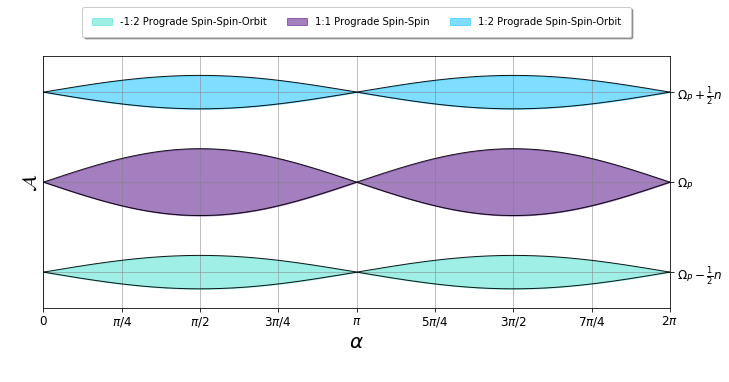

In [3]:
fig = plt.figure(figsize=(10,5))

ax  = fig.add_axes([0.05,0.16,0.87,0.7])

ax.set_ylim([Omegap-.7*n,Omegap+.7*n])#ax.set_ylim([-6,7])
ax.set_xlim([0.,2.*np.pi])
ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xticks([0,np.pi/4,np.pi/2,np.pi/4*3,np.pi,5.*np.pi/4,3.*np.pi/2,np.pi/4*7.,2.*np.pi])
ax.set_xticklabels([r'$0$',r'$\pi/4$', r'$\pi/2$',r'$3\pi/4$',r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$',r'$2\pi$'],fontsize=12)

ax.set_ylabel(r'$\mathcal{A}$',fontsize=20)

ax.yaxis.tick_right()
ax.set_yticks([Omegap-1.*n/2.,Omegap,Omegap+1.*n/2.])
ax.set_yticklabels([r'$\Omega_P-\frac{1}{2}n$',r'$\Omega_P$',r'$\Omega_P+\frac{1}{2}n$'],fontsize=12)

ax.grid(linestyle='-', linewidth='1.', color='grey',alpha=.5)

Gamma11prograde=get_Gamma11prograde(np.linspace(0,2.*np.pi,1000),-Omegap,9./16.*Rp**2*G*Mq/rbar**5*asphericity,Rp,rbar,n,e,asphericity)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11prograde[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11prograde[1],linewidth='1.', color='black',alpha=.9)

Gamma11progrademinus=get_Gamma11progrademinus(np.linspace(0,2.*np.pi,1000),-Omegap,45./32.*Rp**2*G*Mq/rbar**5*e*asphericity,Rp,rbar,n,e,asphericity)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progrademinus[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progrademinus[1],linewidth='1.', color='black',alpha=.9)


Gamma11progradepluss=get_Gamma11progradeplus(np.linspace(0,2.*np.pi,1000),-Omegap,45./32.*Rp**2*G*Mq/rbar**5*e*asphericity,Rp,rbar,n,e,asphericity)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progradepluss[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progradepluss[1],linewidth='1.', color='black',alpha=.9)
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma11progrademinus[1], -Gamma11progrademinus[0],color='turquoise',alpha=.5,label='-1:2 Prograde Spin-Spin-Orbit')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma11prograde[1], -Gamma11prograde[0],color='indigo',alpha=.5,label='1:1 Prograde Spin-Spin')


ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma11progradepluss[1], -Gamma11progradepluss[0],color='deepskyblue',alpha=.5,label='1:2 Prograde Spin-Spin-Orbit')


ax.annotate(r'$\mathcal{A}_{sep}^{-}$', xy=(.5,-.15*n),xytext=(-.28, -.25*n),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate(r'$\mathcal{A}_{sep}^{+}$', xy=(.5,.15*n),xytext=(-.28, .25*n),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))
#ax.annotate(r'$\Gamma_{sep}^{-}$', xy=(.25, .7),xytext=(-.22, -1.5),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                     #       connectionstyle="angle3,angleA=0,angleB=-90"))
#
ax.annotate(r'$\dot{\alpha}=\dot{\phi}+\frac{1}{2}n$', xy=(1.*np.pi/2.,1.*n/2.),xytext=(2.0, .25*n),fontsize=15,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate(r'$\dot{\alpha}=\dot{\phi}$', xy=(3.*np.pi/2.,0.*n/2.),xytext=(3.5, .2*n),fontsize=15,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate(r'$\dot{\alpha}=\dot{\phi}-\frac{1}{2}n$', xy=(1.*np.pi/2.,-1.*n/2.),xytext=(2.0, -.35*n),fontsize=15,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5,1.215),
              frameon=True, loc='upper center', ncol=4)


#plt.savefig('SchematicSurface_spinspinproograde.pdf')





In [4]:
solar=[]
solar_actionvalue=[]
#for j in np.arange(-5.,7.,0.25):
numhammy=300
for j in np.linspace(Omegap-.75*n,Omegap+.75*n,numhammy/3):
    y0 = [np.pi/2., j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar.append(sol)
    solar_actionvalue.append(j)
#for j in np.linspace(-n,n,numhammy/3):
    #y0 = [np.pi, j]
    #sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    #solar.append(sol)
    #solar_actionvalue.append(j)
for j in np.linspace(Omegap-.75*n,Omegap+.75*n,numhammy/3):
    y0 = [3.*np.pi/2., j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar.append(sol)
    solar_actionvalue.append(j)

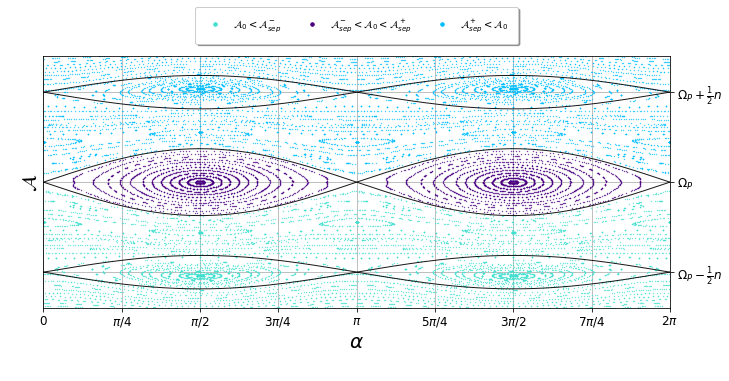

In [5]:
fig = plt.figure(figsize=(10,5))
#ax  = fig.add_axes([0.2,0.2,0.75,0.75])#= fig.add_subplot(1, 1, 1)
ax  = fig.add_axes([0.05,0.16,0.87,0.7])
skip=1
fudge=.7
fudge=1.
for i in np.arange(numhammy*2/3):
    if  (solar_actionvalue[i]<Omegap-2.*fudge*np.sqrt(9.*G*Mq*Rp**2/(16.*rbar**5)*asphericity)):
        ax.plot( (solar[i][::skip, 0]%(2.*np.pi)),solar[i][::skip, 1], 'o',color='turquoise',markersize=.35 )
    if  ((solar_actionvalue[i]>Omegap-2.*fudge*np.sqrt(9.*G*Mq*Rp**2/(16.*rbar**5)*asphericity)) and (solar_actionvalue[i]<Omegap+2.*fudge*np.sqrt(9.*G*Mq*Rp**2/(16.*rbar**5)*asphericity)) ):
        ax.plot( (solar[i][::skip, 0]%(2.*np.pi)),solar[i][::skip, 1], 'o',color='indigo',markersize=.35 )
    if (solar_actionvalue[i]>Omegap+2.*fudge*np.sqrt(9.*G*Mq*Rp**2/(16.*rbar**5)*asphericity)) :
        ax.plot( (solar[i][::skip, 0]%(2.*np.pi)),solar[i][::skip, 1], 'o',color='deepskyblue',markersize=.35 )

ax.plot( (solar[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar[i][:, 1]),'o',color='turquoise', markersize=3.5 ,label=r'$\mathcal{A}_{0}<\mathcal{A}_{sep}^-$')

ax.plot( (solar[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar[i][:, 1]),'o',color='indigo',markersize=3.5 ,label=r'$\mathcal{A}_{sep}^-<\mathcal{A}_{0}<\mathcal{A}_{sep}^+$')

ax.plot( (solar[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar[i][:, 1]),'o',color='deepskyblue',markersize=3.5 ,label=r'$\mathcal{A}_{sep}^+<\mathcal{A}_{0}$')

ax.set_ylim([Omegap-.7*n,Omegap+.7*n])#ax.set_ylim([-6,7])

ax.set_xlim([0.,2.*np.pi])
ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xticks([0,np.pi/4,np.pi/2,np.pi/4*3,np.pi,5.*np.pi/4,3.*np.pi/2,np.pi/4*7.,2.*np.pi])
ax.set_xticklabels([r'$0$',r'$\pi/4$', r'$\pi/2$',r'$3\pi/4$',r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$',r'$2\pi$'],fontsize=12)


ax.set_ylabel(r'$\mathcal{A}$',fontsize=20)

ax.yaxis.tick_right()
ax.set_yticks([Omegap-1.*n/2.,Omegap,Omegap+1.*n/2.])
ax.set_yticklabels([r'$\Omega_P-\frac{1}{2}n$',r'$\Omega_P$',r'$\Omega_P+\frac{1}{2}n$'],fontsize=12)

ax.grid(linestyle='-', linewidth='1.', color='grey',alpha=.5)

Gamma11prograde=get_Gamma11prograde(np.linspace(0,2.*np.pi,1000),-Omegap,9./16.*Rp**2*G*Mq/rbar**5*asphericity,Rp,rbar,n,e,asphericity)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11prograde[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11prograde[1],linewidth='1.', color='black',alpha=.9)

Gamma11progrademinus=get_Gamma11progrademinus(np.linspace(0,2.*np.pi,1000),-Omegap,45./32.*Rp**2*G*Mq/rbar**5*e*asphericity,Rp,rbar,n,e,asphericity)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progrademinus[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progrademinus[1],linewidth='1.', color='black',alpha=.9)


Gamma11progradepluss=get_Gamma11progradeplus(np.linspace(0,2.*np.pi,1000),-Omegap,45./32.*Rp**2*G*Mq/rbar**5*e*asphericity,Rp,rbar,n,e,asphericity)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progradepluss[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progradepluss[1],linewidth='1.', color='black',alpha=.9)
ax.annotate(r'$\mathcal{A}_{sep}^{-}$', xy=(.5,-.15*n),xytext=(-.28, -.25*n),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate(r'$\mathcal{A}_{sep}^{+}$', xy=(.5,.15*n),xytext=(-.28, .25*n),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))




ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5,1.215),
              frameon=True, loc='upper center', ncol=4)


#plt.savefig('Surface_spinspinproograde.pdf')







Section 3: Spin Orbit

In [8]:
G=1.
Mq=.5
Rp=.01
Mp=1.
rbar=1.
e=.2
n=np.sqrt(G*Mp/rbar**5)
Omegap=0.

ap =250
bp = 276.
asphericity=1./1.*(1.-ap**2/bp**2)/(1.+ap**2/bp**2)
print asphericity
asphericity=0.015

print (bp**2-ap**2)/(bp**2+ap**2)

print n/2.
print 2.*np.sqrt(9./16.*Rp**2*G*Mq/rbar**5*asphericity)*(1.+np.sqrt(5.*e/2.))
#n=2.*2.*np.sqrt(9./16.*Rp**2*G*Mq/rbar**5*asphericity)*(1.+np.sqrt(5.*e/2.))
def get_Gamma11(gamma,Omegap,H,Rp,rbar,n,e,asphericity):
    a=.5
    b=(n)
    c=((n)**2/2.-H-3./8.*G/rbar**3*asphericity*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2))*np.cos(2.*gamma))  
    d = (b**2) - (4*a*c)
    sol1 = (-b-np.sqrt(d))/(2*a)
    sol2 = (-b+np.sqrt(d))/(2*a)
    return sol1,sol2
def get_Gamma12(gamma,Omegap,H,Rp,rbar,n,e,asphericity):
    a=.5
    b=(n/2.)
    c=((n/2.)**2/2.-H+3./8.*G/rbar**3*asphericity/2.*e*(2.*Mp+Mq*(4.-5.*(Rp/rbar)**2))*np.cos(2.*gamma)) 
    d = (b**2) - (4*a*c)
    #print d
    sol1 = (-b-np.sqrt(d))/(2*a)
    sol2 = (-b+np.sqrt(d))/(2*a)
    return sol1,sol2
def get_Gamma32_spinorbit(gamma,Omegap,H,Rp,rbar,n,e,asphericity):
    a=.5
    b=(3.*n/2.)
    c=((3.*n/2.)**2/2.-H-3./8.*G/rbar**3*asphericity/2.*e*(14.*Mp+Mq*(28.+45.*(Rp/rbar)**2))*np.cos(2.*gamma)) 
    d = (b**2) - (4*a*c)
    #print d
    sol1 = (-b-np.sqrt(d))/(2*a)
    sol2 = (-b+np.sqrt(d))/(2*a)
    return sol1,sol2
def pend(y, t,G,M,Rp,rbar,e,n,Omegap,asphericity):
    alpha, Alpha = y
    #theta, omega = y
    
    arg1=-(2.*Mp+Mq*(4.-5.*(Rp/rbar)**2))*e/2.*np.sin(n*t-2.*alpha)
    #arg1=(-28.*e*rbar**2+45.*e*Rp**2)*np.sin(n*t-2.*alpha)
    arg2=(14.*Mp+Mq*(28.+45.*(Rp/rbar)**2))*e/2.*np.sin(3.*n*t-2.*alpha)
    arg3=(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2))*np.sin(2.*n*t-2.*alpha)
    
    
    dAlphadt = 3.*G/(8.*rbar**3)*asphericity*(arg1+arg2+arg3)
    
    #dGammadt = 2.*G*(1.+5.*e*np.cos(n*t))*np.sin(2.*gamma)
    dydt = [Alpha, dAlphadt]
    #dydt = [omega, -b*omega - c*np.sin(theta*t)]
    return dydt
y0 = [np.pi/2., .5]
Nspts = 200
tend = 2.*np.pi/n*Nspts

#t = np.linspace(0, tend, Nspts)
t = np.linspace(0, tend, Nspts+1)
sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))

0.0986183622256
0.0986183622256
0.5
0.0022175967592203494


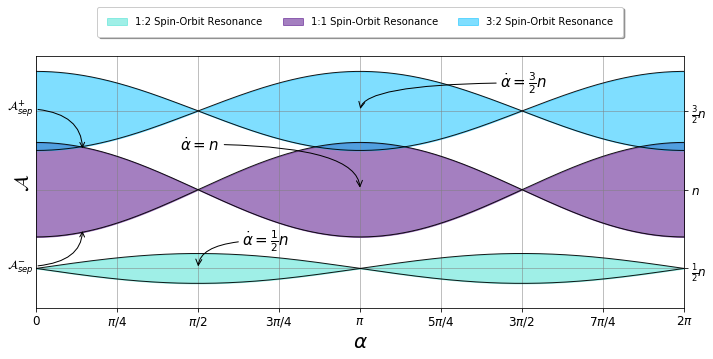

In [9]:
fig = plt.figure(figsize=(10,5))
#ax  = fig.add_axes([0.2,0.2,0.75,0.75])#= fig.add_subplot(1, 1, 1)
ax  = fig.add_axes([0.05,0.16,0.9,0.7])


ax.set_ylim([.25*n,1.85*n])#ax.set_ylim([-6,7])


ax.set_xlim([0.,2.*np.pi])
ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xticks([0,np.pi/4,np.pi/2,np.pi/4*3,np.pi,5.*np.pi/4,3.*np.pi/2,np.pi/4*7.,2.*np.pi])
ax.set_xticklabels([r'$0$',r'$\pi/4$', r'$\pi/2$',r'$3\pi/4$',r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$',r'$2\pi$'],fontsize=12)
ax.set_ylabel(r'$\mathcal{A}$',fontsize=20)

ax.yaxis.tick_right()
ax.set_yticks([n/2.,n,3.*n/2.])
ax.set_yticklabels([r'$\frac{1}{2}n$',r'$n$',r'$\frac{3}{2}n$'],fontsize=12)

ax.grid(linestyle='-', linewidth='1.0', color='grey',alpha=.5)
Gamma11=get_Gamma11(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11[1],linewidth='1.', color='black',alpha=.9)
Gamma12=get_Gamma12(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity/2.*e*(2.*Mp+Mq*(4.-5.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma12[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma12[1],linewidth='1.', color='black',alpha=.9)
Gamma32spinorbit=get_Gamma32_spinorbit(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity/2.*e*(14.*Mp+Mq*(28.+45.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma32spinorbit[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma32spinorbit[1],linewidth='1.', color='black',alpha=.9)
#ax.annotate(r'$\Gamma_{sep}^{+}$', xy=(.25, 1.5),xytext=(-.22, 3),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
            #               connectionstyle="angle3,angleA=0,angleB=-90"))
#ax.annotate(r'$\Gamma_{sep}^{-}$', xy=(.25, .7),xytext=(-.22, -1.5),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                     #       connectionstyle="angle3,angleA=0,angleB=-90"))
#
ax.annotate(r'$\mathcal{A}_{sep}^{-}$', xy=(.45,.75*n),xytext=(-.28, .5*n),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate(r'$\mathcal{A}_{sep}^{+}$', xy=(.45,1.25*n),xytext=(-.28, 1.5*n),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5,1.215),
              frameon=True, loc='upper center', ncol=4)


ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma12[1], -Gamma12[0],color='turquoise',alpha=.5,label='1:2 Spin-Orbit Resonance')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma11[1], -Gamma11[0],color='indigo',alpha=.5,label='1:1 Spin-Orbit Resonance')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma32spinorbit[1], -Gamma32spinorbit[0],color='deepskyblue',alpha=.5,label='3:2 Spin-Orbit Resonance')

#ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5,1.215),
              #frameon=True, loc='upper center', ncol=4)
#ax.annotate(r' ', xy=(np.pi/2.,1.0*n),xytext=(2.9, 1.25*n),fontsize=15,color='black',arrowprops=dict(arrowstyle="->",
                          # connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate(r'$\dot{\alpha}=n$ ', xy=(2.*np.pi/2.,1.0*n),xytext=(1.4, 1.25*n),fontsize=15,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate(r'$\dot{\alpha}=\frac{3}{2}n$', xy=(2.*np.pi/2.,3.*n/2.),xytext=(4.5, 1.65*n),fontsize=15,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))

#ax.annotate(r' ', xy=(np.pi/2.,3.*n/2.),xytext=(2.9, 1.65*n),fontsize=15,color='black',arrowprops=dict(arrowstyle="->",
                      #     connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate(r'$\dot{\alpha}=\frac{1}{2}n$', xy=(1.*np.pi/2.,1.*n/2.),xytext=(2.0, 0.65*n),fontsize=15,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5,1.215),
              frameon=True, loc='upper center', ncol=4)

#plt.savefig('SchematicSurface_spinorbit.pdf')





In [10]:
solar=[]
solar_actionvalue=[]
#for j in np.arange(-5.,7.,0.25):
numhammy=300
numhammy1=150
numhammy2=40
for j in np.linspace(-0.,2.*n,numhammy1):
    y0 = [2.*np.pi/2., j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar.append(sol)
    solar_actionvalue.append(j)
for j in np.linspace(-0.,.6*n,numhammy2):
    y0 = [np.pi/2, j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar.append(sol)
    solar_actionvalue.append(j)
for j in np.linspace(-0.,.6*n,numhammy2):
    y0 = [3.*np.pi/2, j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar.append(sol)
    solar_actionvalue.append(j)
for j in np.linspace(-0.,2.*n,numhammy1):
    y0 = [0.*np.pi/2., j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar.append(sol)
    solar_actionvalue.append(j)

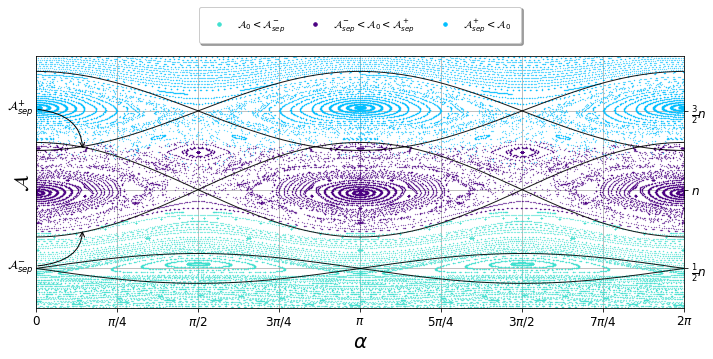

In [11]:
fig = plt.figure(figsize=(10,5))
#ax  = fig.add_axes([0.2,0.2,0.75,0.75])#= fig.add_subplot(1, 1, 1)
ax  = fig.add_axes([0.05,0.16,0.9,0.7])
skip=1
fudge=.9
for i in np.arange(2*numhammy1+2*numhammy2):
    if  (solar_actionvalue[i]<n-Omegap-2.*fudge*np.sqrt(3./8.*G*asphericity/rbar**3*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2)))):
      #  ax.plot( (solar[i][:, 0]%(2.*np.pi)),solar[i][:, 1], 'o',color='turquoise',markersize=.5 )
    #if (np.linspace(-5.,7.,numhammy)[i]<2.498) and (np.linspace(-5.,7.,numhammy)[i]>-.498):
        ax.plot( (solar[i][::skip, 0]%(2.*np.pi)),solar[i][::skip, 1], 'o',color='turquoise',markersize=.25 )
    if  ((solar_actionvalue[i]>n-Omegap-2.*fudge*np.sqrt(3./8.*G*asphericity/rbar**3*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2)))) and (solar_actionvalue[i]<n-Omegap+2.*np.sqrt(3./8.*G*asphericity/rbar**3*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2)))) ):
        ax.plot( (solar[i][::skip, 0]%(2.*np.pi)),solar[i][::skip, 1], 'o',color='indigo',markersize=.25 )
    if (solar_actionvalue[i]>n-Omegap+2.*np.sqrt(3./8.*G*asphericity/rbar**3*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2)))) :
        ax.plot( (solar[i][::skip, 0]%(2.*np.pi)),solar[i][::skip, 1], 'o',color='deepskyblue',markersize=.25 )
ax.plot( (solar[i][:, 0]%(2.*np.pi)),10.*np.ones_like(solar[i][:, 1]),'o',color='turquoise', markersize=3.5 ,label=r'$\mathcal{A}_{0}<\mathcal{A}_{sep}^-$')

ax.plot( (solar[i][:, 0]%(2.*np.pi)),10.*np.ones_like(solar[i][:, 1]),'o',color='indigo',markersize=3.5 ,label=r'$\mathcal{A}_{sep}^-<\mathcal{A}_{0}<\mathcal{A}_{sep}^+$')

ax.plot( (solar[i][:, 0]%(2.*np.pi)),10.*np.ones_like(solar[i][:, 1]),'o',color='deepskyblue',markersize=3.5 ,label=r'$\mathcal{A}_{sep}^+<\mathcal{A}_{0}$')


ax.set_ylim([.25*n,1.85*n])#ax.set_ylim([-6,7])
ax.set_xlim([0.,2.*np.pi])
ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xticks([0,np.pi/4,np.pi/2,np.pi/4*3,np.pi,5.*np.pi/4,3.*np.pi/2,np.pi/4*7.,2.*np.pi])
ax.set_xticklabels([r'$0$',r'$\pi/4$', r'$\pi/2$',r'$3\pi/4$',r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$',r'$2\pi$'],fontsize=12)
ax.set_ylabel(r'$\mathcal{A}$',fontsize=20)

ax.yaxis.tick_right()
ax.set_yticks([n/2.,n,3.*n/2.])
ax.set_yticklabels([r'$\frac{1}{2}n$',r'$n$',r'$\frac{3}{2}n$'],fontsize=12)

ax.grid(linestyle='-', linewidth='1.0', color='grey',alpha=.5)
Gamma11=get_Gamma11(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11[1],linewidth='1.', color='black',alpha=.9)
Gamma12=get_Gamma12(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity/2.*e*(2.*Mp+Mq*(4.-5.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma12[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma12[1],linewidth='1.', color='black',alpha=.9)
Gamma32spinorbit=get_Gamma32_spinorbit(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity/2.*e*(14.*Mp+Mq*(28.+45.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma32spinorbit[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma32spinorbit[1],linewidth='1.', color='black',alpha=.9)

ax.annotate(r'$\mathcal{A}_{sep}^{-}$', xy=(.45,.75*n),xytext=(-.28, .5*n),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate(r'$\mathcal{A}_{sep}^{+}$', xy=(.45,1.25*n),xytext=(-.28, 1.5*n),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))


ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5,1.215),
              frameon=True, loc='upper center', ncol=4)


#plt.savefig('Surface_spinorbit.pdf')






Section 5 Spin Spin Retrograde

In [12]:
G=1.
Mq=1.
Rp=.3
Mp=20.
rbar=1.
e=.05
n=np.sqrt(G*Mp/rbar**5)
Omegap=n/2
print Omegap
Omegap=0.

ap =276/2.
bp = 276.
asphericity=1./1.*(1.-ap**2/bp**2)/(1.+ap**2/bp**2)
print asphericity
#asphericity=0.63

print (bp**2-ap**2)/(bp**2+ap**2)

print n/2.
print 2.*np.sqrt(105./16.*Rp**2*G*Mq/rbar**5*asphericity)*(1.+np.sqrt(13.*e/2.))
#n=2.*2.*np.sqrt(9./16.*Rp**2*G*Mq/rbar**5*asphericity)*(1.+np.sqrt(5.*e/2.))
#n=2.*2.*np.sqrt(105./16.*Rp**2*G*Mq/rbar**5*asphericity)*(1.+np.sqrt(13.*e/2.))
def get_Gamma21(gamma,Omegap,H,Rp,rbar,n,e,asphericity):
    a=.5
    b=(-Omegap+n*2.)
    c=((-Omegap+n*2.)**2/2.-H-105./16.*Rp**2*G*Mq/rbar**5*asphericity*np.cos(2.*gamma))  
    d = (b**2) - (4*a*c)
    sol1 = (-b-np.sqrt(d))/(2*a)
    sol2 = (-b+np.sqrt(d))/(2*a)
    return sol1,sol2
def get_Gamma52(gamma,Omegap,H,Rp,rbar,n,e,asphericity):
    a=.5
    b=(-Omegap+5.*n/2.)
    c=((-Omegap+5.*n/2.)**2/2.-H-1365./32.*Rp**2*G*Mq*e/rbar**5*asphericity*np.cos(2.*gamma))  
    d = (b**2) - (4*a*c)
    sol1 = (-b-np.sqrt(d))/(2*a)
    sol2 = (-b+np.sqrt(d))/(2*a)
    return sol1,sol2
def get_Gamma32(gamma,Omegap,H,Rp,rbar,n,e,asphericity):
    a=.5
    b=(-Omegap+3.*n/2.)
    c=((-Omegap+3.*n/2.)**2/2.-H+315./32.*Rp**2*G*Mq*e/rbar**5*asphericity*np.cos(2.*gamma))  
    d = (b**2) - (4*a*c)

    sol1 = (-b-np.sqrt(d))/(2*a)
    sol2 = (-b+np.sqrt(d))/(2*a)
    return sol1,sol2

2.23606797749979
0.6
0.6
2.23606797749979
1.869327730783992


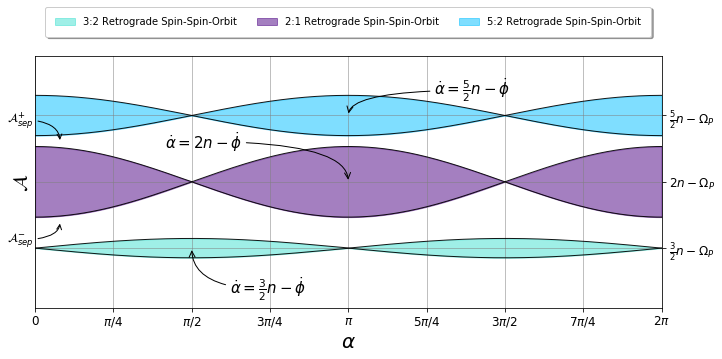

In [13]:
fig = plt.figure(figsize=(10,5))
ax  = fig.add_axes([0.05,0.16,0.87,0.7])


ax.set_ylim([1.05*n-Omegap,2.95*n-Omegap])#ax.set_ylim([-6,7])

ax.set_xlim([0.,2.*np.pi])
ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xticks([0,np.pi/4,np.pi/2,np.pi/4*3,np.pi,5.*np.pi/4,3.*np.pi/2,np.pi/4*7.,2.*np.pi])
ax.set_xticklabels([r'$0$',r'$\pi/4$', r'$\pi/2$',r'$3\pi/4$',r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$',r'$2\pi$'],fontsize=12)


ax.set_ylabel(r'$\mathcal{A}$',fontsize=20)

ax.yaxis.tick_right()
ax.set_yticks([3.*n/2.-Omegap,2.*n-Omegap,5.*n/2.-Omegap])
ax.set_yticklabels([r'$\frac{3}{2}n-\Omega_P$',r'$2n-\Omega_P$',r'$\frac{5}{2}n-\Omega_P$'],fontsize=12)

ax.grid(linestyle='-', linewidth='1.', color='grey',alpha=.5)
Gamma21=get_Gamma21(np.linspace(0,2.*np.pi,1000),Omegap,105./16.*Rp**2*G*Mq/rbar**5*asphericity,Rp,rbar,n,e,asphericity)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma21[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma21[1],linewidth='1.', color='black',alpha=.9)
Gamma52=get_Gamma52(np.linspace(0,2.*np.pi,1000),Omegap,1365./32.*Rp**2*G*Mq*e/rbar**5*asphericity,Rp,rbar,n,e,asphericity)


plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma52[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma52[1],linewidth='1.', color='black',alpha=.9)
Gamma32=get_Gamma32(np.linspace(0,2.*np.pi,1000),Omegap,315./32.*Rp**2*G*Mq*e/rbar**5*asphericity,Rp,rbar,n,e,asphericity)


plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32[1],linewidth='1.', color='black',alpha=.9)
ax.annotate(r'$\mathcal{A}_{sep}^{-}$', xy=(.25,1.7*n),xytext=(-.28, 1.55*n),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate(r'$\mathcal{A}_{sep}^{+}$', xy=(.25,2.3*n),xytext=(-.28, 2.45*n),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))

ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma32[1], -Gamma32[0],color='turquoise',alpha=.5,label='3:2 Retrograde Spin-Spin-Orbit')

ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma21[1], -Gamma21[0],color='indigo',alpha=.5,label='2:1 Retrograde Spin-Spin-Orbit')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma52[1], -Gamma52[0],color='deepskyblue',alpha=.5,label='5:2 Retrograde Spin-Spin-Orbit')

ax.annotate(r'$\dot{\alpha}=2n-\dot{\phi}$ ', xy=(2.*np.pi/2.,2.0*n),xytext=(1.3, 2.25*n),fontsize=15,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate(r'$\dot{\alpha}=\frac{5}{2}n-\dot{\phi}$', xy=(2.*np.pi/2.,5.*n/2.),xytext=(4.0, 2.65*n),fontsize=15,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate(r'$\dot{\alpha}=\frac{3}{2}n-\dot{\phi}$', xy=(1.*np.pi/2.,3.*n/2.),xytext=(1.95, 1.15*n),fontsize=15,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))
#
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5,1.215),
              frameon=True, loc='upper center', ncol=4)


#plt.savefig('SchematicSurface_spinspinretrograde.pdf')






In [14]:
def pend(y, t,G,M,Rp,rbar,e,n,Omegap,asphericity):
    alpha, Alpha = y
    #theta, omega = y
    
    arg1=np.sin(4.*n*t-2.*alpha-2.*Omegap*t)
    #arg1=(-28.*e*rbar**2+45.*e*Rp**2)*np.sin(n*t-2.*alpha)
    arg2=e*13./2.*np.sin(5.*n*t-2.*alpha-2.*Omegap*t)
    arg3=-e*3./2.*np.sin(3.*n*t-2.*alpha-2.*Omegap*t)
    dAlphadt = 105.*G*Mq*Rp**2/(8.*rbar**5)*asphericity*(arg1+arg2+arg3)
    
    #dGammadt = 2.*G*(1.+5.*e*np.cos(n*t))*np.sin(2.*gamma)
    dydt = [Alpha, dAlphadt]
    #dydt = [omega, -b*omega - c*np.sin(theta*t)]
    return dydt
y0 = [np.pi/2., .5]
Nspts = 200
tend = 2.*np.pi/n*Nspts

#t = np.linspace(0, tend, Nspts)
t = np.linspace(0, tend, Nspts+1)
sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))




In [15]:
solar=[]
solar_actionvalue=[]
#for j in np.arange(-5.,7.,0.25):
numhammy1=80
numhammy2=20
for j in np.linspace(1.05*n-Omegap,1.65*n-Omegap,numhammy2):
    y0 = [np.pi/2., j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar.append(sol)
    solar_actionvalue.append(j)
for j in np.linspace(1.05*n-Omegap,2.95*n-Omegap,numhammy1):
    y0 = [np.pi, j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar.append(sol)
    solar_actionvalue.append(j)
for j in np.linspace(1.05*n-Omegap,1.65*n-Omegap,numhammy2):
    y0 = [3.*np.pi/2., j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar.append(sol)
    solar_actionvalue.append(j)


for j in np.linspace(1.05*n-Omegap,2.95*n-Omegap,numhammy1):
    y0 = [0.02*np.pi, j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar.append(sol)
    solar_actionvalue.append(j)



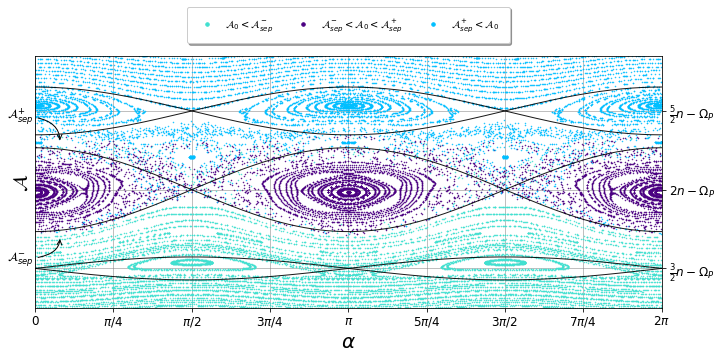

In [16]:
fig = plt.figure(figsize=(10,5))

ax  = fig.add_axes([0.05,0.16,0.87,0.7])
skip=1
fudge=1.
for i in np.arange(2*numhammy1+2*numhammy2):
    
    #print np.linspace(-5.,7.,numhammy)[i]
    if  (solar_actionvalue[i]<2.*n-Omegap-2.*fudge*np.sqrt(105./16.*Rp**2*G*Mq/rbar**5*asphericity)):
      #  ax.plot( (solar[i][:, 0]%(2.*np.pi)),solar[i][:, 1], 'o',color='turquoise',markersize=.5 )
    #if (np.linspace(-5.,7.,numhammy)[i]<2.498) and (np.linspace(-5.,7.,numhammy)[i]>-.498):
        ax.plot( (solar[i][::skip, 0]%(2.*np.pi)),solar[i][::skip, 1], 'o',color='turquoise',markersize=.5 )
    if  ((solar_actionvalue[i]>2.*n-Omegap-2.*fudge*np.sqrt(105./16.*Rp**2*G*Mq/rbar**5*asphericity)) and (solar_actionvalue[i]<2.*n-Omegap+2.*np.sqrt(105./16.*Rp**2*G*Mq/rbar**5*asphericity)) ):
        ax.plot( (solar[i][::skip, 0]%(2.*np.pi)),solar[i][::skip, 1], 'o',color='indigo',markersize=.5 )
    if (solar_actionvalue[i]>2.*n-Omegap+2.*np.sqrt(105./16.*Rp**2*G*Mq/rbar**5*asphericity)) :
        ax.plot( (solar[i][::skip, 0]%(2.*np.pi)),solar[i][::skip, 1], 'o',color='deepskyblue',markersize=.5 )
    #if (np.linspace(-5.,7.,numhammy)[i]>2.498):
    #ax.plot( (solar[i][:, 0]%(2.*np.pi)),solar[i][:, 1], 'o',color='deepskyblue',markersize=.5 )
ax.plot( (solar[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar[i][:, 1]),'o',color='turquoise', markersize=3.5 ,label=r'$\mathcal{A}_{0}<\mathcal{A}_{sep}^-$')

ax.plot( (solar[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar[i][:, 1]),'o',color='indigo',markersize=3.5 ,label=r'$\mathcal{A}_{sep}^-<\mathcal{A}_{0}<\mathcal{A}_{sep}^+$')

ax.plot( (solar[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar[i][:, 1]),'o',color='deepskyblue',markersize=3.5 ,label=r'$\mathcal{A}_{sep}^+<\mathcal{A}_{0}$')


#ax.plot( (solar[i][:, 0]%(2.*np.pi)),10.*np.ones_like(solar[i][:, 1]),color='deepskyblue',markersize=.5 ,label=r'$\Gamma_{sep}^+<\Gamma_{0}$')
ax.set_ylim([1.25*n-Omegap,2.85*n-Omegap])#ax.set_ylim([-6,7])





ax.set_xlim([0.,2.*np.pi])
ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xticks([0,np.pi/4,np.pi/2,np.pi/4*3,np.pi,5.*np.pi/4,3.*np.pi/2,np.pi/4*7.,2.*np.pi])
ax.set_xticklabels([r'$0$',r'$\pi/4$', r'$\pi/2$',r'$3\pi/4$',r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$',r'$2\pi$'],fontsize=12)


ax.set_ylabel(r'$\mathcal{A}$',fontsize=20)

ax.yaxis.tick_right()
ax.set_yticks([3.*n/2.-Omegap,2.*n-Omegap,5.*n/2.-Omegap])
ax.set_yticklabels([r'$\frac{3}{2}n-\Omega_P$',r'$2n-\Omega_P$',r'$\frac{5}{2}n-\Omega_P$'],fontsize=12)

ax.grid(linestyle='-', linewidth='1.', color='grey',alpha=.5)

#Gamma21=get_Gamma21(np.linspace(0,2.*np.pi,1000),Omegap,105./16.*Rp**2*G*M/rbar**5,Rp,rbar,n,e)
Gamma21=get_Gamma21(np.linspace(0,2.*np.pi,1000),Omegap,105./16.*Rp**2*G*Mq/rbar**5*asphericity,Rp,rbar,n,e,asphericity)


ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma21[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma21[1],linewidth='1.', color='black',alpha=.9)
#Gamma52=get_Gamma52(np.linspace(0,2.*np.pi,1000),Omegap,1365./32.*Rp**2*G*M*e/rbar**5,Rp,rbar,n,e)
Gamma52=get_Gamma52(np.linspace(0,2.*np.pi,1000),Omegap,1365./32.*Rp**2*G*Mq*e/rbar**5*asphericity,Rp,rbar,n,e,asphericity)


plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma52[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma52[1],linewidth='1.', color='black',alpha=.9)
#Gamma32=get_Gamma32(np.linspace(0,2.*np.pi,1000),Omegap,315./32.*Rp**2*G*M*e/rbar**5,Rp,rbar,n,e)
Gamma32=get_Gamma32(np.linspace(0,2.*np.pi,1000),Omegap,315./32.*Rp**2*G*Mq*e/rbar**5*asphericity,Rp,rbar,n,e,asphericity)


plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32[1],linewidth='1.', color='black',alpha=.9)
ax.annotate(r'$\mathcal{A}_{sep}^{-}$', xy=(.25,1.7*n),xytext=(-.28, 1.55*n),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))
ax.annotate(r'$\mathcal{A}_{sep}^{+}$', xy=(.25,2.3*n),xytext=(-.28, 2.45*n),fontsize=12,color='black',arrowprops=dict(arrowstyle="->",
                           connectionstyle="angle3,angleA=0,angleB=-90"))

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5,1.215),
              frameon=True, loc='upper center', ncol=4)

#
#plt.savefig('Surface_spinspinretrograde.pdf')





Section 6 All Resonances

In [17]:
G=1.
Mq=20.
Rp=.6
Mp=20.
rbar=1.
e=.3
n=np.sqrt(G*Mp/rbar**5)
Omegap=5.*n/2

ap =276/2.
bp = 276.
asphericity=1./1.*(1.-ap**2/bp**2)/(1.+ap**2/bp**2)
print asphericity
asphericity=0.01

print (bp**2-ap**2)/(bp**2+ap**2)

print n/2.
print 2.*np.sqrt(105./16.*Rp**2*G*Mq/rbar**5*asphericity)*(1.+np.sqrt(13.*e/2.))
#n=2.*2.*np.sqrt(9./16.*Rp**2*G*Mq/rbar**5*asphericity)*(1.+np.sqrt(5.*e/2.))
#n=2.*2.*np.sqrt(105./16.*Rp**2*G*Mq/rbar**5*asphericity)*(1.+np.sqrt(13.*e/2.))

0.6
0.6
2.23606797749979
3.2945383191798907


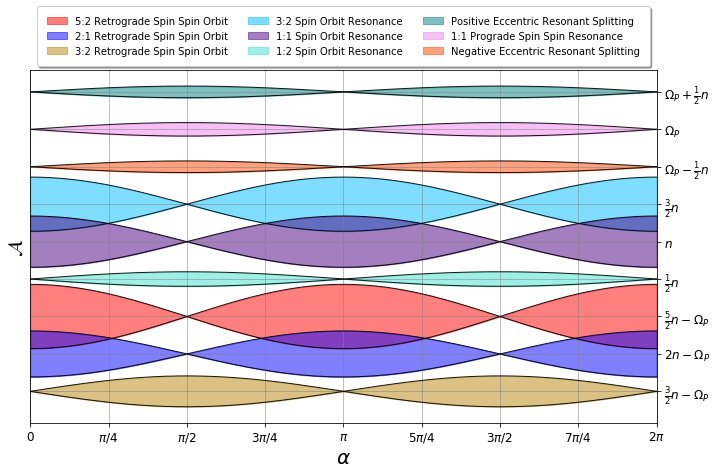

In [18]:
fig = plt.figure(figsize=(10,7))
#ax  = fig.add_axes([0.2,0.2,0.75,0.75])#= fig.add_subplot(1, 1, 1)
ax  = fig.add_axes([0.05,0.16,0.87,0.7])




ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xticks([0,np.pi/4,np.pi/2,np.pi/4*3,np.pi,5.*np.pi/4,3.*np.pi/2,np.pi/4*7.,2.*np.pi])
ax.set_xticklabels([r'$0$',r'$\pi/4$', r'$\pi/2$',r'$3\pi/4$',r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$',r'$2\pi$'],fontsize=12)


ax.set_ylabel(r'$\mathcal{A}$',fontsize=20)

ax.yaxis.tick_right()

ax.set_yticks([Omegap-1.*n/2.,Omegap,Omegap+1.*n/2.,n/2.,n,3.*n/2.,3.*n/2-Omegap,2.*n-Omegap,5.*n/2.-Omegap])
ax.set_yticklabels([r'$\Omega_P-\frac{1}{2}n$',r'$\Omega_P$',r'$\Omega_P+\frac{1}{2}n$',r'$\frac{1}{2}n$',r'$n$',r'$\frac{3}{2}n$',r'$\frac{3}{2}n-\Omega_P$',r'$2n-\Omega_P$',r'$\frac{5}{2}n-\Omega_P$'],fontsize=12)
#ax.grid(linestyle='-', linewidth='2.5', color='grey',alpha=.5)



Gamma11prograde=get_Gamma11prograde(np.linspace(0,2.*np.pi,1000),-Omegap,9./16.*Rp**2*G*Mq/rbar**5*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11prograde[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11prograde[1],linewidth='1.', color='black',alpha=.9)

Gamma11progrademinus=get_Gamma11progrademinus(np.linspace(0,2.*np.pi,1000),-Omegap,45./32.*Rp**2*G*Mq/rbar**5*e*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progrademinus[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progrademinus[1],linewidth='1.', color='black',alpha=.9)

Gamma11progradepluss=get_Gamma11progradeplus(np.linspace(0,2.*np.pi,1000),-Omegap,45./32.*Rp**2*G*Mq/rbar**5*e*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progradepluss[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progradepluss[1],linewidth='1.', color='black',alpha=.9)

Gamma21=get_Gamma21(np.linspace(0,2.*np.pi,1000),Omegap,105./16.*Rp**2*G*Mq/rbar**5*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma21[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma21[1],linewidth='1.', color='black',alpha=.9)

Gamma52=get_Gamma52(np.linspace(0,2.*np.pi,1000),Omegap,1365./32.*Rp**2*G*Mq*e/rbar**5*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma52[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma52[1],linewidth='1.', color='black',alpha=.9)

Gamma32=get_Gamma32(np.linspace(0,2.*np.pi,1000),Omegap,315./32.*Rp**2*G*Mq*e/rbar**5*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32[1],linewidth='1.', color='black',alpha=.9)
#plt.fill_between(np.linspace(0,np.pi), Gamma[1], Gamma[0],color='grey',alpha=.1)

Gamma11=get_Gamma11(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11[1],linewidth='1.', color='black',alpha=.9)

Gamma12=get_Gamma12(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity/2.*e*(2.*Mp+Mq*(4.-5.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma12[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma12[1],linewidth='1.', color='black',alpha=.9)

Gamma32spinorbit=get_Gamma32_spinorbit(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity/2.*e*(14.*Mp+Mq*(28.+45.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32spinorbit[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32spinorbit[1],linewidth='1.', color='black',alpha=.9)







ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma52[1], -Gamma52[0],color='red',alpha=.5,label='5:2 Retrograde Spin Spin Orbit')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma21[1], -Gamma21[0],color='blue',alpha=.5,label='2:1 Retrograde Spin Spin Orbit')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma32[1], -Gamma32[0],color='darkgoldenrod',alpha=.5,label='3:2 Retrograde Spin Spin Orbit')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma32spinorbit[1], -Gamma32spinorbit[0],color='deepskyblue',alpha=.5,label='3:2 Spin Orbit Resonance')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma11[1], -Gamma11[0],color='indigo',alpha=.5,label='1:1 Spin Orbit Resonance')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma12[1], -Gamma12[0],color='turquoise',alpha=.5,label='1:2 Spin Orbit Resonance')

ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma11progradepluss[1], -Gamma11progradepluss[0],color='teal',alpha=.5,label='Positive Eccentric Resonant Splitting')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma11prograde[1], -Gamma11prograde[0],color='violet',alpha=.5,label='1:1 Prograde Spin Spin Resonance')

ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma11progrademinus[1], -Gamma11progrademinus[0],color='orangered',alpha=.5,label='Negative Eccentric Resonant Splitting')







ax.set_xlim([0.,2.*np.pi])
ax.grid(linestyle='-', linewidth='1.', color='grey',alpha=.5)

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5,1.195),
              frameon=True, loc='upper center', ncol=3)

#plt.savefig('FullEvolutionSchematic.pdf')

In [19]:
def pend(y, t,G,Mq,Rp,rbar,e,n,Omegap,asphericity):
    alpha, Alpha = y
    
    #2nd term -- prograde spin spin
    arg1=np.sin(2.*alpha-2.*Omegap*t)
    arg2=e*5./2.*np.sin(2.*alpha-2.*Omegap*t-n*t)
    arg3=e*5./2.*np.sin(2.*alpha-2.*Omegap*t+n*t)
    #dAlphadt_prograde = -9.*G*M*Rp**2/(8.*rbar**5)*(arg1+arg2+arg3)
    dAlphadt_prograde = +9.*G*Mq*Rp**2*asphericity/(8.*rbar**5)*(arg1+arg2+arg3)
    
    arg1=np.sin(4.*n*t-2.*alpha-2.*Omegap*t)
    #arg1=(-28.*e*rbar**2+45.*e*Rp**2)*np.sin(n*t-2.*alpha)
    arg2=e*13./2.*np.sin(5.*n*t-2.*alpha-2.*Omegap*t)
    arg3=-e*3./2.*np.sin(3.*n*t-2.*alpha-2.*Omegap*t)
    dAlphadt_retrograde = 105.*G*Mq*Rp**2/(8.*rbar**5)*asphericity*(arg1+arg2+arg3)
    
    arg1=-(2.*Mp+Mq*(4.-5.*(Rp/rbar)**2))*e/2.*np.sin(n*t-2.*alpha)
    #arg1=(-28.*e*rbar**2+45.*e*Rp**2)*np.sin(n*t-2.*alpha)
    arg2=(14.*Mp+Mq*(28.+45.*(Rp/rbar)**2))*e/2.*np.sin(3.*n*t-2.*alpha)
    arg3=(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2))*np.sin(2.*n*t-2.*alpha)
    
    
    dAlphadt_spinorbit = 3.*G/(8.*rbar**3)*asphericity*(arg1+arg2+arg3)
    
    dAlphadt=dAlphadt_prograde+dAlphadt_spinorbit+dAlphadt_retrograde

    dydt = [Alpha, dAlphadt]
    return dydt
y0 = [np.pi/2., .5]
Nspts = 100
tend = 2.*np.pi/n*Nspts
t = np.linspace(0, tend, Nspts+1)
sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))




In [20]:
solar=[]
solar_actionvalue=[]
#for j in np.arange(-5.,7.,0.25):
numhammy=300
for j in np.linspace(Omegap-.75*n,Omegap+.75*n,numhammy/3):
    y0 = [np.pi/2., j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar.append(sol)
    solar_actionvalue.append(j)
#for j in np.linspace(-n,n,numhammy/3):
    #y0 = [np.pi, j]
    #sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    #solar.append(sol)
    #solar_actionvalue.append(j)
for j in np.linspace(Omegap-.75*n,Omegap+.75*n,numhammy/3):
    y0 = [3.*np.pi/2., j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar.append(sol)
    solar_actionvalue.append(j)

In [21]:
solar_spinorbit=[]
solar_actionvalue_spinorbit=[]
#for j in np.arange(-5.,7.,0.25):
numhammy=300
numhammy1=150
numhammy2=40
for j in np.linspace(0.25*n,2.*n,numhammy1):
    y0 = [2.*np.pi/2., j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar_spinorbit.append(sol)
    solar_actionvalue_spinorbit.append(j)
for j in np.linspace(0.25*n,.6*n,numhammy2):
    y0 = [np.pi/2, j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar_spinorbit.append(sol)
    solar_actionvalue_spinorbit.append(j)
for j in np.linspace(0.25*n,.6*n,numhammy2):
    y0 = [3.*np.pi/2, j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar_spinorbit.append(sol)
    solar_actionvalue_spinorbit.append(j)
for j in np.linspace(0.25*n,2.*n,numhammy1):
    y0 = [0.*np.pi/2., j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar_spinorbit.append(sol)
    solar_actionvalue_spinorbit.append(j)

In [22]:
solar_retrograde=[]
solar_actionvalue_retrograde=[]
#for j in np.arange(-5.,7.,0.25):
numhammy1_retrograde=80
numhammy2_retrograde=20
for j in np.linspace(1.05*n-Omegap,1.65*n-Omegap,numhammy2_retrograde):
    y0 = [np.pi/2., j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar_retrograde.append(sol)
    solar_actionvalue_retrograde.append(j)
for j in np.linspace(1.05*n-Omegap,2.95*n-Omegap,numhammy1_retrograde):
    y0 = [np.pi, j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar_retrograde.append(sol)
    solar_actionvalue_retrograde.append(j)
for j in np.linspace(1.05*n-Omegap,1.65*n-Omegap,numhammy2_retrograde):
    y0 = [3.*np.pi/2., j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar_retrograde.append(sol)
    solar_actionvalue_retrograde.append(j)


for j in np.linspace(1.05*n-Omegap,2.95*n-Omegap,numhammy1_retrograde):
    y0 = [0.02*np.pi, j]
    sol = odeint(pend, y0, t, args=(G,Mq,Rp,rbar,e,n,Omegap,asphericity))
    solar_retrograde.append(sol)
    solar_actionvalue_retrograde.append(j)

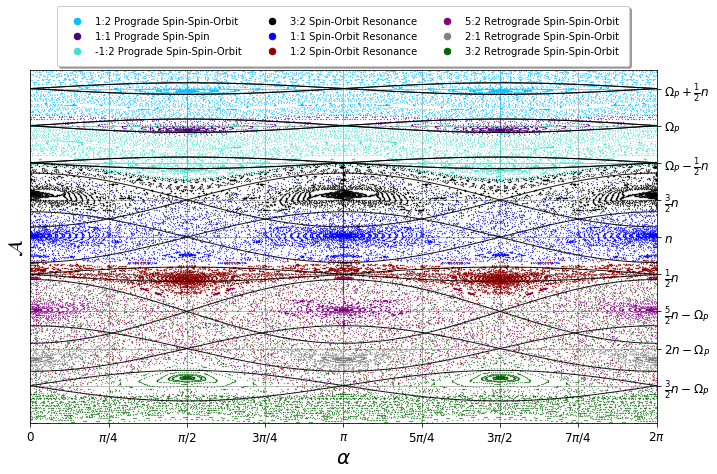

In [23]:
fig = plt.figure(figsize=(10,7))
#ax  = fig.add_axes([0.2,0.2,0.75,0.75])#= fig.add_subplot(1, 1, 1)
ax  = fig.add_axes([0.05,0.16,0.87,0.7])


skip=1
fudge=.7
fudge=1.
for i in np.arange(numhammy*2/3):
    if  (solar_actionvalue[i]<Omegap-2.*fudge*np.sqrt(9.*G*Mq*Rp**2/(16.*rbar**5)*asphericity)):
        ax.plot( (solar[i][::skip, 0]%(2.*np.pi)),solar[i][::skip, 1], 'o',color='turquoise',markersize=.25 )
    if  ((solar_actionvalue[i]>Omegap-2.*fudge*np.sqrt(9.*G*Mq*Rp**2/(16.*rbar**5)*asphericity)) and (solar_actionvalue[i]<Omegap+2.*fudge*np.sqrt(9.*G*Mq*Rp**2/(16.*rbar**5)*asphericity)) ):
        ax.plot( (solar[i][::skip, 0]%(2.*np.pi)),solar[i][::skip, 1], 'o',color='indigo',markersize=.25 )
    if (solar_actionvalue[i]>Omegap+2.*fudge*np.sqrt(9.*G*Mq*Rp**2/(16.*rbar**5)*asphericity)) :
        ax.plot( (solar[i][::skip, 0]%(2.*np.pi)),solar[i][::skip, 1], 'o',color='deepskyblue',markersize=.25 )
ax.plot( (solar[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar[i][:, 1]),
        'o',color='deepskyblue',markersize=6.5 ,label=r'1:2 Prograde Spin-Spin-Orbit')


ax.plot( (solar[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar[i][:, 1]),'o'
        ,color='indigo',markersize=6.5 ,label=r'1:1 Prograde Spin-Spin')
ax.plot( (solar[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar[i][:, 1]),
        'o',color='turquoise', markersize=6.5 ,label=r'-1:2 Prograde Spin-Spin-Orbit')


#ax.set_ylim([Omegap-.7*n,Omegap+.7*n])#ax.set_ylim([-6,7])

#spin orbit
fudge=.9
for i in np.arange(2*numhammy1+2*numhammy2):
    if  (solar_actionvalue_spinorbit[i]<n-2.*fudge*np.sqrt(3./8.*G*asphericity/rbar**3*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2)))):
      #  ax.plot( (solar[i][:, 0]%(2.*np.pi)),solar[i][:, 1], 'o',color='turquoise',markersize=.5 )
    #if (np.linspace(-5.,7.,numhammy)[i]<2.498) and (np.linspace(-5.,7.,numhammy)[i]>-.498):
        ax.plot( (solar_spinorbit[i][::skip, 0]%(2.*np.pi)),solar_spinorbit[i][::skip, 1], 'o',color='darkred',markersize=.25 )
    if  ((solar_actionvalue_spinorbit[i]>n-2.*fudge*np.sqrt(3./8.*G*asphericity/rbar**3*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2)))) and (solar_actionvalue_spinorbit[i]<n+2.*np.sqrt(3./8.*G*asphericity/rbar**3*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2)))) ):
        ax.plot( (solar_spinorbit[i][::skip, 0]%(2.*np.pi)),solar_spinorbit[i][::skip, 1], 'o',color='blue',markersize=.25 )
    if (solar_actionvalue_spinorbit[i]>n+2.*np.sqrt(3./8.*G*asphericity/rbar**3*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2)))) :
        ax.plot( (solar_spinorbit[i][::skip, 0]%(2.*np.pi)),solar_spinorbit[i][::skip, 1], 'o',color='black',markersize=.25 )

ax.plot( (solar_spinorbit[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar_spinorbit[i][:, 1]),
        'o',color='black',markersize=6.5 ,label=r'3:2 Spin-Orbit Resonance')       
        

ax.plot( (solar_spinorbit[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar_spinorbit[i][:, 1]),
        'o',color='blue',markersize=6.5 ,label=r'1:1 Spin-Orbit Resonance')
ax.plot( (solar_spinorbit[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar_spinorbit[i][:, 1]),
        'o',color='darkred', markersize=6.5 ,label=r'1:2 Spin-Orbit Resonance')

#retrograde
fudge=1.
for i in np.arange(2*numhammy1_retrograde+2*numhammy2_retrograde):
    
    #print np.linspace(-5.,7.,numhammy)[i]
    if  (solar_actionvalue_retrograde[i]<2.*n-Omegap-2.*fudge*np.sqrt(105./16.*Rp**2*G*Mq/rbar**5*asphericity)):
      #  ax.plot( (solar[i][:, 0]%(2.*np.pi)),solar[i][:, 1], 'o',color='turquoise',markersize=.5 )
    #if (np.linspace(-5.,7.,numhammy)[i]<2.498) and (np.linspace(-5.,7.,numhammy)[i]>-.498):
        ax.plot( (solar_retrograde[i][::skip, 0]%(2.*np.pi)),solar_retrograde[i][::skip, 1], 'o',color='darkgreen',markersize=.25 )
    if  ((solar_actionvalue_retrograde[i]>2.*n-Omegap-2.*fudge*np.sqrt(105./16.*Rp**2*G*Mq/rbar**5*asphericity)) and (solar_actionvalue_retrograde[i]<2.*n-Omegap+2.*np.sqrt(105./16.*Rp**2*G*Mq/rbar**5*asphericity)) ):
        ax.plot( (solar_retrograde[i][::skip, 0]%(2.*np.pi)),solar_retrograde[i][::skip, 1], 'o',color='grey',markersize=.25 )
    if (solar_actionvalue_retrograde[i]>2.*n-Omegap+2.*np.sqrt(105./16.*Rp**2*G*Mq/rbar**5*asphericity)) :
        ax.plot( (solar_retrograde[i][::skip, 0]%(2.*np.pi)),solar_retrograde[i][::skip, 1], 'o',color='purple',markersize=.25 )
    #if (np.linspace(-5.,7.,numhammy)[i]>2.498):
    #ax.plot( (solar[i][:, 0]%(2.*np.pi)),solar[i][:, 1], 'o',color='deepskyblue',markersize=.5 )
ax.plot( (solar_retrograde[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar_retrograde[i][:, 1]),
        'o',color='purple',markersize=6.5 ,label=r'5:2 Retrograde Spin-Spin-Orbit')

ax.plot( (solar_retrograde[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar_retrograde[i][:, 1]),
        'o',color='grey',markersize=6.5 ,label=r'2:1 Retrograde Spin-Spin-Orbit')



ax.plot( (solar_retrograde[i][:, 0]%(2.*np.pi)),1000.*np.ones_like(solar_retrograde[i][:, 1]),'o',
        color='darkgreen', markersize=6.5 ,label=r'3:2 Retrograde Spin-Spin-Orbit')


ax.set_xlim([0.,2.*np.pi])
ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xticks([0,np.pi/4,np.pi/2,np.pi/4*3,np.pi,5.*np.pi/4,3.*np.pi/2,np.pi/4*7.,2.*np.pi])
ax.set_xticklabels([r'$0$',r'$\pi/4$', r'$\pi/2$',r'$3\pi/4$',r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$',r'$2\pi$'],fontsize=12)


ax.set_ylabel(r'$\mathcal{A}$',fontsize=20)

ax.yaxis.tick_right()
#ax.set_yticks([Omegap-1.*n/2.,Omegap,Omegap+1.*n/2.])
#ax.set_yticklabels([r'$\Omega_P-\frac{1}{2}n$',r'$\Omega_P$',r'$\Omega_P+\frac{1}{2}n$'],fontsize=12)
ax.set_yticks([Omegap-1.*n/2.,Omegap,Omegap+1.*n/2.,n/2.,n,3.*n/2.,3.*n/2-Omegap,2.*n-Omegap,5.*n/2.-Omegap])
ax.set_yticklabels([r'$\Omega_P-\frac{1}{2}n$',r'$\Omega_P$',r'$\Omega_P+\frac{1}{2}n$',r'$\frac{1}{2}n$',r'$n$',r'$\frac{3}{2}n$',r'$\frac{3}{2}n-\Omega_P$',r'$2n-\Omega_P$',r'$\frac{5}{2}n-\Omega_P$'],fontsize=12)
#ax.grid(linestyle='-', linewidth='2.5', color='grey',alpha=.5)


ax.grid(linestyle='-', linewidth='1.', color='grey',alpha=.5)

ax.set_ylim([1.*n-Omegap,Omegap+.75*n])

Gamma11prograde=get_Gamma11prograde(np.linspace(0,2.*np.pi,1000),-Omegap,9./16.*Rp**2*G*Mq/rbar**5*asphericity,Rp,rbar,n,e,asphericity)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11prograde[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11prograde[1],linewidth='1.', color='black',alpha=.9)

Gamma11progrademinus=get_Gamma11progrademinus(np.linspace(0,2.*np.pi,1000),-Omegap,45./32.*Rp**2*G*Mq/rbar**5*e*asphericity,Rp,rbar,n,e,asphericity)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progrademinus[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progrademinus[1],linewidth='1.', color='black',alpha=.9)


Gamma11progradepluss=get_Gamma11progradeplus(np.linspace(0,2.*np.pi,1000),-Omegap,45./32.*Rp**2*G*Mq/rbar**5*e*asphericity,Rp,rbar,n,e,asphericity)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progradepluss[0],linewidth='1.', color='black',alpha=.9)
ax.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progradepluss[1],linewidth='1.', color='black',alpha=.9)


ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5,1.195),
              frameon=True, loc='upper center', ncol=3)
#
#plt.savefig('Surface_spinspinproograde.pdf')



Gamma11prograde=get_Gamma11prograde(np.linspace(0,2.*np.pi,1000),-Omegap,9./16.*Rp**2*G*Mq/rbar**5*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11prograde[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11prograde[1],linewidth='1.', color='black',alpha=.9)

Gamma11progrademinus=get_Gamma11progrademinus(np.linspace(0,2.*np.pi,1000),-Omegap,45./32.*Rp**2*G*Mq/rbar**5*e*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progrademinus[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progrademinus[1],linewidth='1.', color='black',alpha=.9)

Gamma11progradepluss=get_Gamma11progradeplus(np.linspace(0,2.*np.pi,1000),-Omegap,45./32.*Rp**2*G*Mq/rbar**5*e*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progradepluss[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progradepluss[1],linewidth='1.', color='black',alpha=.9)

Gamma21=get_Gamma21(np.linspace(0,2.*np.pi,1000),Omegap,105./16.*Rp**2*G*Mq/rbar**5*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma21[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma21[1],linewidth='1.', color='black',alpha=.9)

Gamma52=get_Gamma52(np.linspace(0,2.*np.pi,1000),Omegap,1365./32.*Rp**2*G*Mq*e/rbar**5*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma52[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma52[1],linewidth='1.', color='black',alpha=.9)

Gamma32=get_Gamma32(np.linspace(0,2.*np.pi,1000),Omegap,315./32.*Rp**2*G*Mq*e/rbar**5*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32[1],linewidth='1.', color='black',alpha=.9)
#plt.fill_between(np.linspace(0,np.pi), Gamma[1], Gamma[0],color='grey',alpha=.1)

Gamma11=get_Gamma11(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11[1],linewidth='1.', color='black',alpha=.9)

Gamma12=get_Gamma12(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity/2.*e*(2.*Mp+Mq*(4.-5.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma12[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma12[1],linewidth='1.', color='black',alpha=.9)

Gamma32spinorbit=get_Gamma32_spinorbit(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity/2.*e*(14.*Mp+Mq*(28.+45.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32spinorbit[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32spinorbit[1],linewidth='1.', color='black',alpha=.9)


#plt.savefig('Surface_full.pdf')





Section 7: Kleopatra

In [24]:
#kleopatra parameters
G= 6.674e-11
#semi major of cleoselene
r1 = 454.e3
#period of cleoselene in seconds
period1 = 1.24*24.*60.*60.
#mass in kg
masskleo= 4.67e18
Mp=masskleo
Mq=masskleo/2.
#radius of kleo in m
Rp = 276.e3/2.
rbar = r1
e=.05
e=.01
n=np.sqrt(G*Mp/rbar**3)
#omega p = 5.39 hr in seconds
Omegap=2.*np.pi/(5.39*60.*60.)
asphericity=1./1.*(1.-ap**2/bp**2)/(1.+ap**2/bp**2)*np.sin(np.pi/4.)
asphericity=0.63*np.cos(np.pi/4.)


0.44547727214752497


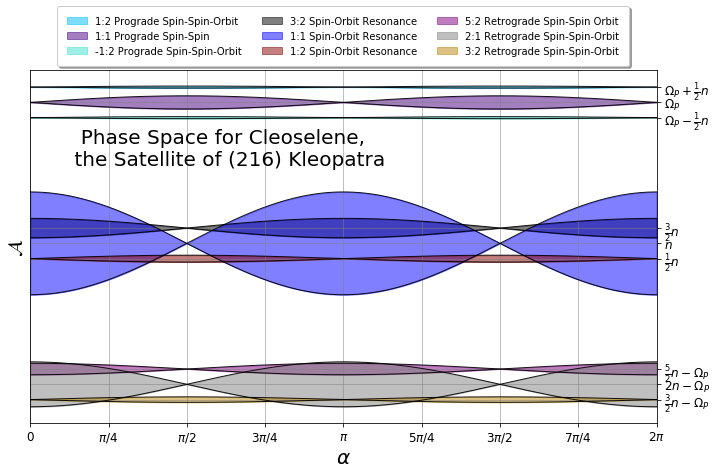

In [25]:
fig = plt.figure(figsize=(10,7))
#ax  = fig.add_axes([0.2,0.2,0.75,0.75])#= fig.add_subplot(1, 1, 1)
ax  = fig.add_axes([0.05,0.16,0.87,0.7])




ax.set_xlabel(r'$\alpha$',fontsize=20)
ax.set_xticks([0,np.pi/4,np.pi/2,np.pi/4*3,np.pi,5.*np.pi/4,3.*np.pi/2,np.pi/4*7.,2.*np.pi])
ax.set_xticklabels([r'$0$',r'$\pi/4$', r'$\pi/2$',r'$3\pi/4$',r'$\pi$',r'$5\pi/4$',r'$3\pi/2$',r'$7\pi/4$',r'$2\pi$'],fontsize=12)


ax.set_ylabel(r'$\mathcal{A}$',fontsize=20)

ax.yaxis.tick_right()

ax.set_yticks([Omegap-1.*n/2.,Omegap,Omegap+1.*n/2.,n/2.,n,3.*n/2.,3.*n/2-Omegap,2.*n-Omegap,5.*n/2.-Omegap])
ax.set_yticklabels([r'$\Omega_P-\frac{1}{2}n$',r'$\Omega_P$',r'$\Omega_P+\frac{1}{2}n$',r'$\frac{1}{2}n$',r'$n$',r'$\frac{3}{2}n$',r'$\frac{3}{2}n-\Omega_P$',r'$2n-\Omega_P$',r'$\frac{5}{2}n-\Omega_P$'],fontsize=12)
#ax.grid(linestyle='-', linewidth='2.5', color='grey',alpha=.5)



Gamma11prograde=get_Gamma11prograde(np.linspace(0,2.*np.pi,1000),-Omegap,9./16.*Rp**2*G*Mq/rbar**5*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11prograde[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11prograde[1],linewidth='1.', color='black',alpha=.9)

Gamma11progrademinus=get_Gamma11progrademinus(np.linspace(0,2.*np.pi,1000),-Omegap,45./32.*Rp**2*G*Mq/rbar**5*e*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progrademinus[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progrademinus[1],linewidth='1.', color='black',alpha=.9)

Gamma11progradepluss=get_Gamma11progradeplus(np.linspace(0,2.*np.pi,1000),-Omegap,45./32.*Rp**2*G*Mq/rbar**5*e*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progradepluss[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11progradepluss[1],linewidth='1.', color='black',alpha=.9)

Gamma21=get_Gamma21(np.linspace(0,2.*np.pi,1000),Omegap,105./16.*Rp**2*G*Mq/rbar**5*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma21[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma21[1],linewidth='1.', color='black',alpha=.9)

Gamma52=get_Gamma52(np.linspace(0,2.*np.pi,1000),Omegap,1365./32.*Rp**2*G*Mq*e/rbar**5*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma52[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma52[1],linewidth='1.', color='black',alpha=.9)

Gamma32=get_Gamma32(np.linspace(0,2.*np.pi,1000),Omegap,315./32.*Rp**2*G*Mq*e/rbar**5*asphericity,Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32[1],linewidth='1.', color='black',alpha=.9)
#plt.fill_between(np.linspace(0,np.pi), Gamma[1], Gamma[0],color='grey',alpha=.1)

Gamma11=get_Gamma11(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity*(2.*Mp+Mq*(4.+5.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma11[1],linewidth='1.', color='black',alpha=.9)

Gamma12=get_Gamma12(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity/2.*e*(2.*Mp+Mq*(4.-5.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma12[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma12[1],linewidth='1.', color='black',alpha=.9)

Gamma32spinorbit=get_Gamma32_spinorbit(np.linspace(0,2.*np.pi,1000),Omegap,3./8.*G/rbar**3*asphericity/2.*e*(14.*Mp+Mq*(28.+45.*(Rp/rbar)**2)),Rp,rbar,n,e,asphericity)

plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32spinorbit[0],linewidth='1.', color='black',alpha=.9)
plt.plot(np.linspace(0,2.*np.pi,1000),-Gamma32spinorbit[1],linewidth='1.', color='black',alpha=.9)




ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma11progradepluss[1], -Gamma11progradepluss[0],color='deepskyblue',alpha=.5,label='1:2 Prograde Spin-Spin-Orbit')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma11prograde[1], -Gamma11prograde[0],color='indigo',alpha=.5,label='1:1 Prograde Spin-Spin')

ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma11progrademinus[1], -Gamma11progrademinus[0],color='turquoise',alpha=.5,label='-1:2 Prograde Spin-Spin-Orbit')




ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma32spinorbit[1], -Gamma32spinorbit[0],color='black',alpha=.5,label='3:2 Spin-Orbit Resonance')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma11[1], -Gamma11[0],color='blue',alpha=.5,label='1:1 Spin-Orbit Resonance')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma12[1], -Gamma12[0],color='darkred',alpha=.5,label='1:2 Spin-Orbit Resonance')

ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma52[1], -Gamma52[0],color='purple',alpha=.5,label='5:2 Retrograde Spin-Spin Orbit')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma21[1], -Gamma21[0],color='grey',alpha=.5,label='2:1 Retrograde Spin-Spin-Orbit')
ax.fill_between(np.linspace(0,2.*np.pi,1000), -Gamma32[1], -Gamma32[0],color='darkgoldenrod',alpha=.5,label='3:2 Retrograde Spin-Spin-Orbit')


ax.annotate('  Phase Space for Cleoselene, \n the Satellite of (216) Kleopatra', xy=(.25,2.*n),xytext=(.38, 3.55*n),fontsize=20,color='black')#,arrowprops=dict(arrowstyle="->",
                          # connectionstyle="angle3,angleA=0,angleB=-90"))




ax.set_xlim([0.,2.*np.pi])
ax.grid(linestyle='-', linewidth='1.', color='grey',alpha=.5)

ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1,bbox_to_anchor=(0.5,1.195),
              frameon=True, loc='upper center', ncol=3)

#plt.savefig('Kleopatra_phasespace.pdf')
print asphericity



(1000, 1000)
3.28985507246
4.91304347826


/Users/darrylseligman/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'color'
  s)


Text(12.5,0.55,'Retrograde Spin-Spin \n          Overlap ')

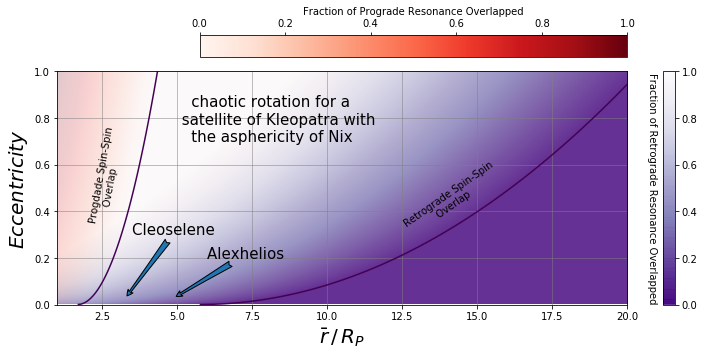

In [26]:
fig = plt.figure(figsize=(10,5))
ax  = fig.add_axes([0.08,0.16,0.99,0.81])
asphericity=0.63#*np.cos(np.pi/4.)
rbar_ar,ecc_ar = np.meshgrid(np.linspace(Rp,20.*Rp,1000),np.linspace(0,1.,1000) )
print rbar_ar.shape
LHS_ssr = np.sqrt(G*Mp/rbar_ar**3)/2.
RHS_ssr = 2.*np.sqrt(105.*G*asphericity*Mq*Rp**2/16./rbar_ar**5)**(1.+np.sqrt(13./2.*ecc_ar))

w1_ssr = 2.*np.sqrt(105.*G*asphericity*Mq*Rp**2/16./rbar_ar**5*(1.))
w2_ssr = 2.*np.sqrt(105.*G*asphericity*Mq*Rp**2/16./rbar_ar**5*(13./2.*ecc_ar))


LHS_ssp = np.sqrt(G*Mp/rbar_ar**3)/2.
RHS_ssp = 2.*np.sqrt(9.*G*asphericity*Mq*Rp**2/16./rbar_ar**5)*(1.+np.sqrt(5./2.*ecc_ar))

w1_ssp = 2.*np.sqrt(9.*G*asphericity*Mq*Rp**2/16./rbar_ar**5*(1.))
w2_ssp = 2.*np.sqrt(9.*G*asphericity*Mq*Rp**2/16./rbar_ar**5*(5./2.*ecc_ar))

contours_ret=plt.contour(rbar_ar/Rp,ecc_ar,(w1_ssr+w2_ssr)/LHS_ssr,[1],color=' hot')
#ax.clabel(contours_ret, inline=True, fontsize=8,fmt='fuc')
contours_pro=plt.contour(rbar_ar/Rp,ecc_ar,RHS_ssp/LHS_ssp,[1,100,1000],color='black')
#ax.clabel(contours_pro, inline=False, fontsize=15,fmt='fuc',inline_spacing=100)

#cs = ax.contourf(rbrp, ecc, fracoverlap,100,cmap=plt.cm.plasma)#, corner_mask=corner_mask)
#ax.contour(cs)#, colors='k')
#cbar = fig.colorbar(cs)

#(w1_ssr+LHS_ssr+w2_ssr)/(2.*w1_ssr)
#here starts
cs2=ax.imshow(((w1_ssp-LHS_ssp+w2_ssp)/(2.*w1_ssp)), extent=[1, 20, 0, 1], origin='lower',
           cmap='Reds', alpha=1.,aspect='auto',vmin=0.,vmax=1.)

cbar2 = fig.colorbar(cs2,location='top',shrink=0.6,spacing='tight')
cbar2.set_label('Fraction of Prograde Resonance Overlapped', rotation=0)


cs=ax.imshow(((w1_ssr-LHS_ssr+w2_ssr)/(2.*w1_ssr)), extent=[1, 20, 0, 1], origin='lower',
           cmap='Purples_r', alpha=0.8,aspect='auto',vmin=0.,vmax=1.)

cbar = fig.colorbar(cs)
cbar.set_label('Fraction of Retrograde Resonance Overlapped', rotation=270,labelpad=-40)

#plt.colorbar()

ax.set_xlabel(r'$\bar{r}\,/\,R_P$',fontsize=20)
ax.set_ylabel(r'$Eccentricity$',fontsize=20)
#ax.set_ylim([0.,1.])

#ax.set_xlim([.99,10.8])

Cleoselene=454.e3
Alexhelios =678.e3
print Cleoselene/Rp
print Alexhelios/Rp
ax.grid(linestyle='-', linewidth='1.0', color='grey',alpha=.5)
ax.annotate('Cleoselene ', xy=(Cleoselene/Rp,.03),xytext=(3.5,.3),fontsize=15,
            color='black',arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3,rad=-0.0"))
ax.annotate('Alexhelios ', xy=(Alexhelios/Rp,.03),xytext=(6,.2),fontsize=15,
            color='black',arrowprops=dict(arrowstyle="fancy",connectionstyle="arc3,rad=-0.0"))
ax.annotate('   chaotic rotation for a \n satellite of Kleopatra with\n   the asphericity of Nix' ,
            xy=(Alexhelios/Rp,.03),xytext=(5,.7),fontsize=15,
            color='black',)
ax.annotate('Progdade Spin-Spin \n      Overlap ', xy=(2.0275,.7),fontsize=10,rotation=80)
ax.annotate('Retrograde Spin-Spin \n          Overlap ', xy=(12.5,.55),fontsize=10,rotation=35)
#plt.savefig('hypothetical_satellite_kleo.pdf')